# Custom Climate Profiles Generation


This notebook generates custom `Climate Profile` hourly datasets (8760) of two varieties. 

1. Standard Year Profile (AMY, single variable)
2. Typical Meteorological Year Profile (TMY, multi-variable)

You will be able to generate a climate profile for a warming level and/or location not already present in our catalog. 

### What is a climate profile?

A climate profile...

### 2 Different kinds of profiles

1. AMY
2. TMY

Are you just looking to generate profiles for one of the pre-generated 32 weather stations? Check out this page.

## Setup

In [ ]:
%config InlineBackend.figure_format = 'svg' # Make plots look better in the notebook environment 
%reload_ext autoreload
%autoreload 2

from climakitae.explore.amy import get_climate_profile

import climakitae as ck
import pandas as pd

import matplotlib.pyplot as plt


## Average Meteoroligical Year (AMY)

Examining a particular month within the Average Meteorological Year can provide hourly information that could inform energy usage analysis. For example, a warm season month can be used to examine cooling demand; while a cold season month can be used for exploring heating demand change under future climate conditions.

To analyze a specific month, we'll retrieve some of the absolute AMY data of interest shown above. Please select in the explore panel above 'Absolute' as your AMY Type, and either 'Historical' or 'Warming Level Future' with a warming level of your choosing. A progress bar is provided when running the cell below, as this step may take a little while. 

Visualize one month from the Average Meteorological Year 
First, we'll subset the dataframe to grab data for the month of January. You can change the month easily by changing the variable `month`; just make sure the value you is the shortened version of the month (i.e. "Jan" instead of "January") so that the code can find the substring in the `amy_data` object. 

### Generating AMY

Select the warming level, location and variable for which you want to generate the AMY. You can view your options for each variable by _

1. **Select variable.** The default is "Air Temperature at 2m". Want to know what variables (and their associated units) are available to choose from? Check out our variable list [here](https://github.com/cal-adapt/climakitae/blob/main/climakitae/data/variable_descriptions.csv).

In [ ]:
variable = "Air Temperature at 2m" 
units = "degF"

2. **Select quantile.** Insert explanation and acceptable range.

In [ ]:
q = 0.5 # float | list[float], default 0.5, quantile for profile calculation

3. **Select warming level.** The default is [1.2] and base options are [1.5, 1.75, 2.0, 2.25, 2.5]. If you decide to generate AMY for a warming level outside of that list, keep in mind that the realistic range of warming levels is _. 

In [10]:
warming_level = [1.45]  # List[float], default [1.2]

4. **Select location.** You have a choice of either selecting from one of 32 cached locations, _ cashed areas, or providing a custom point location of interest. If you are only interested in generating an AMY for a cached location, please go to this notebook instead.

In [ ]:
latitude = 32.7136 # float or tuple
longitude = -117.2031  # float or tuple

5. Now we define the selection by the choices you've made above and generate the climate profile. AMY generation time ranges from around 5 miinutes for a single grid cell and and to an hour for the entire state of California.

In [ ]:
selection = {
    "variable": variable,
    "resolution": "3 km",
    "warming_level": warming_level,
    "units": units,
    "latitude": latitude,
    "longitude": longitude
}

In [ ]:

profile = get_climate_profile(**selection)

In [ ]:
# for testing
profile = get_climate_profile(
    stations=["San Diego Lindbergh Field (KSAN)"],
    warming_level=[2.0],
)

📊 Retrieving climate data...


Data retrieval:   0%|          | 0/2 [00:00<?, ?dataset/s]

   📍 Converting 1 station(s) to lat/lon coordinates with ±0.02° buffer
      Latitude range: 32.7136 to 32.7536
      Longitude range: -117.2031 to -117.1631
⚙️  Computing climate profiles...
      📊 Processing 262,800 hours (30 years) of data
      🎯 Computing 50th percentile for each hour of year
      ⚙️ Computing quantiles for 1 warming level(s) and 8 simulation(s)


      Computing profiles:   0%|          | 0/8 [00:00<?, ?combo/s]

      ✅ Profile computation complete! Final shape: (365, 192)
         With index: Day of Year, columns: ['Hour', 'Simulation']
         Units: degF
      📊 Processing 262,800 hours (30 years) of data
      🎯 Computing 50th percentile for each hour of year
      ⚙️ Computing quantiles for 1 warming level(s) and 8 simulation(s)


      Computing profiles:   0%|          | 0/8 [00:00<?, ?combo/s]

      ✅ Profile computation complete! Final shape: (365, 192)
         With index: Day of Year, columns: ['Hour', 'Simulation']
         Units: degF


   Computing paired differences:   0%|          | 0/192 [00:00<?, ?column/s]

✅ Climate profile computation complete! Final shape: (365, 192)
   (Days: 365, Hours/Columns: 192)


###  Visualizing AMY

If you generated AMY for a single warming level, you can visualize your result below. A figure is produce for each of the 8 simulations used in profile generation.

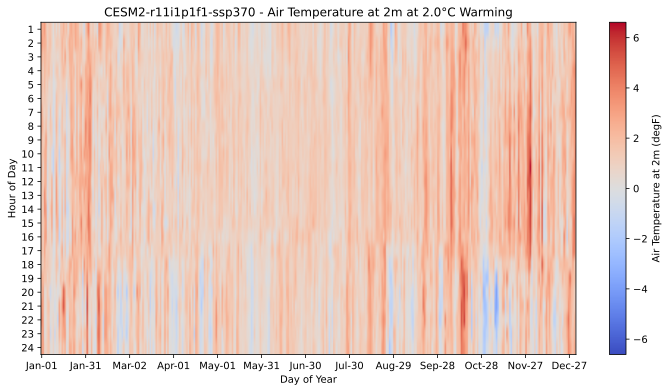

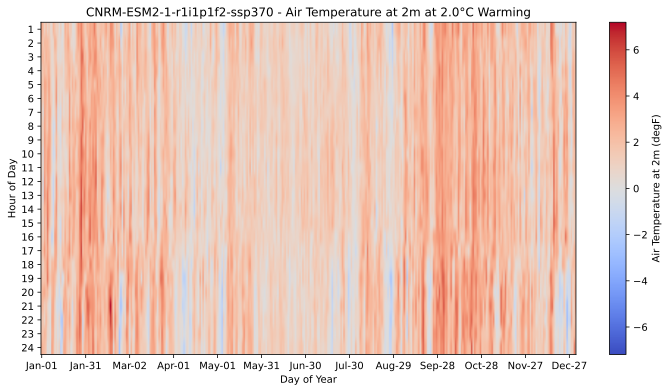

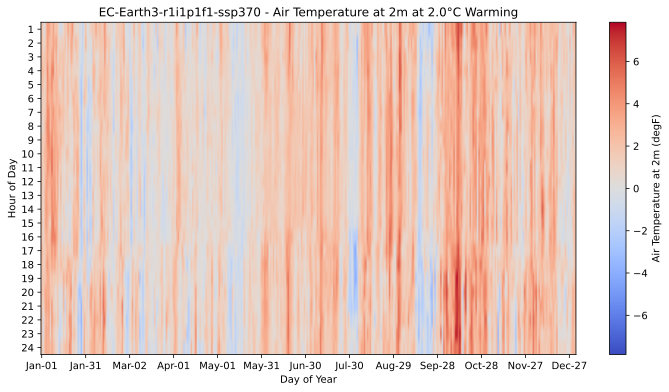

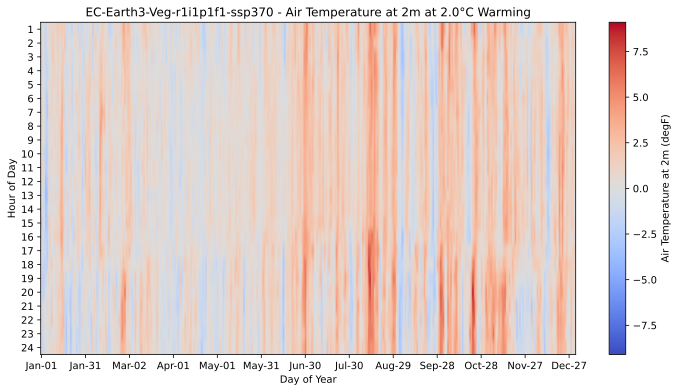

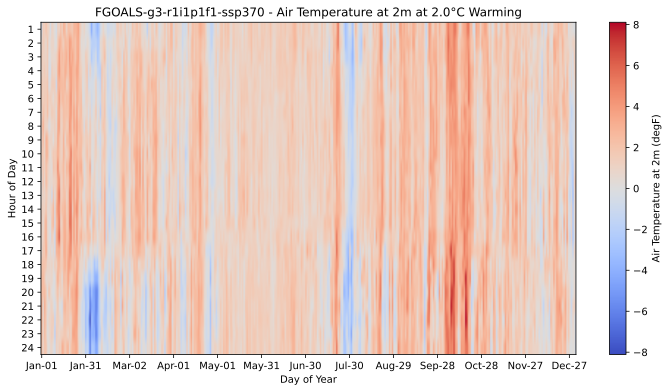

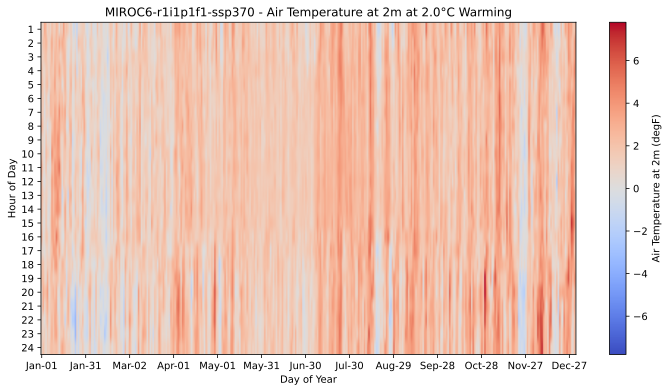

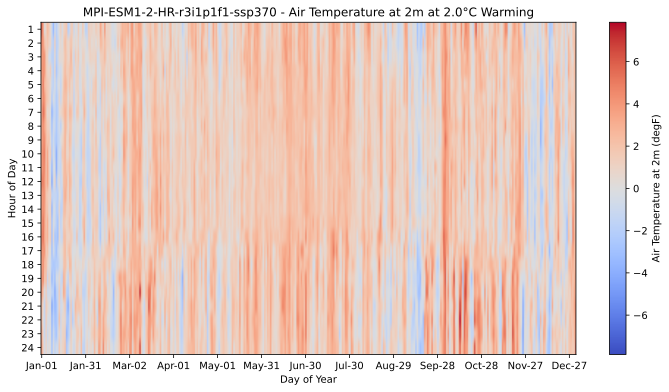

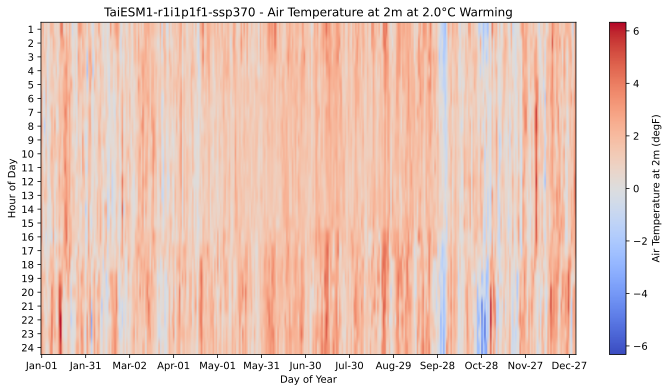

In [9]:
idx = pd.IndexSlice
sims = profile.columns.get_level_values("Simulation").unique().tolist()

for sim in sims:
    # Select columns for the current simulation
    data = profile.loc[:, idx[:, sim]]
    # Assuming the first level is month and the second is simulation
    # We'll plot a heatmap of the data for each simulation
    plt.figure(figsize=(12, 6))
    plt.imshow(data.values.T, aspect="auto", cmap="coolwarm")
    plt.colorbar(label=f"{selection['variable']} ({selection['units']})")
    plt.yticks(range(data.shape[1]), data.columns.get_level_values(0))
    plt.xticks(range(data.shape[0]), data.index)
    plt.title(
        f"{sim} - {selection['variable']} at {selection['warming_level'][0]}°C Warming"
    )
    plt.xlabel("Day of Year")
    plt.ylabel("Hour of Day")
    vmin = -max(abs(data.values.max()), abs(data.values.min()))
    vmax = max(abs(data.values.max()), abs(data.values.min()))
    xtick_freq = max(1, data.shape[0] // 12)
    plt.xticks(range(0, data.shape[0], xtick_freq), data.index[::xtick_freq])
    plt.clim(vmin, vmax)
    plt.show()

If you generated AMY for multuple warming levels, visualize your result here. It will produce a figure for each of the 8 simulations used in profile generation, for each warming level you provided.

In [ ]:
idx = pd.IndexSlice
sims = profile.columns.get_level_values("Simulation").unique().tolist()
wls = profile.columns.get_level_values("Warming_Level").unique().tolist()

for wl in wls:
    for sim in sims:
        # Select columns for the current simulation
        data = profile.loc[:, idx[:, wl, sim]]
        # Assuming the first level is month and the second is simulation
        # We'll plot a heatmap of the data for each simulation
        plt.figure(figsize=(12, 6))
        plt.imshow(data.values.T, aspect='auto', cmap='coolwarm')
        plt.colorbar(label=f"{selection['variable']} ({selection['units']})")
        plt.yticks(range(data.shape[1]), data.columns.get_level_values(0))
        plt.xticks(range(data.shape[0]), data.index)
        plt.title(f"{sim} - {selection['variable']} at {wl}°C Warming")
        plt.xlabel("Day of Year")
        plt.ylabel("Hour of Day")
        vmin = -max(abs(data.values.max()), abs(data.values.min()))
        vmax = max(abs(data.values.max()), abs(data.values.min()))
        xtick_freq = max(1, data.shape[0] // 12)
        plt.xticks(range(0, data.shape[0], xtick_freq), data.index[::xtick_freq])
        plt.clim(vmin, vmax)
        plt.show()

## Typical Meteorological Year (TMY)

AMY is best for most cases. If you are specifically looking to generate a TMY, this is the place for you. 

### Generating TMY

1. Select warming level

2. Select location

### Visualizing TMY

# Scraps

Options for
GWL selection
variable
custom point-location
Timing estimate
      

        - variable (Optional) : str, default "Air Temperature at 2m"
        - resolution (Optional) : str, default "3 km"
        - warming_level (Required) : List[float], default [1.2]
        - cached_area (Optional) : str or List[str]
        - units (Optional) : str, default "degF"
        - latitude (Optional) : float or tuple
        - longitude (Optional) : float or tuple
        - stations (Optional) : list[str], default None
        - days_in_year (Optional) : int, default 365
        - q (Optional) : float | list[float], default 0.5, quantile for profile calculation
        - no_delta (optional) : bool, default False, if True, do not apply baseline subtraction, return raw future profile


from climakitae.explore.amy import get_climate_profile

# Test with a single station
print("Testing with San Diego station...")
profile_one_station = get_climate_profile(
    stations=["San Diego Lindbergh Field (KSAN)"],
    warming_level=[2.0],
)

profile_two_stations = get_climate_profile(
    stations=[
        "San Diego Lindbergh Field (KSAN)", 
        "Los Angeles International Airport (KLAX)"
    ],
    warming_level=[2.0],
)

https://github.com/cal-adapt/climakitae/blob/8182900aa62947285cb8ebbe6f29d9b9acdc6991/climakitae/explore/amy.py#L214